# STOCK PRICE PREDICTION BY USING LSTM

    In this project we are using LSTM and ANN algorithms to predict stock prices and we trained both algorithm in different stock prices such as TATA, TESLA, Facebook, Apple etc. In both algorithm ANN is giving high accuracy and less Mean Square Error (MSE).
    We have experiment both algorithms on above mention different stock prices and both algorithm showing close and accurate prices of original test data. We have splitted dataset into train & test where application using 80% dataset size for training and 20% for testing.
### To implement this project we have used same dataset given in your requirement file and to implement this project we have designed following modules <br>
#### 1)	Upload Stock Price Dataset: 
    using this module we will select STOCK Name and then upload dataset and application will extract all records from selected stock name and then sort dataset in ascending date order and then plot stock price history graph
#### 2)	Preprocess Dataset: 
    using this module we will remove missing values and then normalize stock values using MINMAX SCALER algorithm and then split dataset into train and test. 80% dataset using for training and 20% for testing
#### 3)	Train ANN Algorithm: 
    using this module we will input 80% dataset to ANN algorithm to train a model and this model will be applied on 20% test data and then calculate difference between actual stock test price and predicted price as MSE error.
#### 4)	Train LSTM Algorithm: 
    using this module we will input 80% dataset to LSTM algorithm to train a model and this model will be applied on 20% test data and then calculate difference between actual stock test price and predicted price as MSE error.
#### 5)	MSE Comparison Graph: 
    using this module we will plot MSE comparison graph between both algorithms


# 1. Importing Required Libraries

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, LSTM

# 2. Loading and Preparing Data

Loading the dataset containing stock prices. The dataset is read using pandas.

In [2]:
filename = 'Dataset/stock_data.csv'
fname = os.path.basename(filename)
data = pd.read_csv(filename)
data

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL
...,...,...,...,...,...,...,...,...
19581,2017-11-06,178.56000,180.45000,178.31000,180.17000,13275578,0,FB
19582,2017-11-07,180.50000,180.74800,179.40300,180.25000,12903836,0,FB
19583,2017-11-08,179.79000,180.35000,179.11000,179.56000,10467606,0,FB
19584,2017-11-09,178.31000,179.40000,177.09000,179.30000,12602188,0,FB


# 3. Filtering Stock Data

Here, we filter the dataset based on the selected stock name. As in below cell I have selected FB, similarlly we change it to AAPL, MSFT or TSLA

In [3]:
stock_list = ['AAPL', 'FB', 'MSFT', 'TSLA']
stock_name = stock_list[1]      # Selecting 'FB' (Facebook)
if fname == 'NSE-Tata-Global-Beverages-Limited.csv':
    dataset = pd.read_csv(filename,usecols=['Date','Open','High','Low','Close'])
    dataset["Date"] = pd.to_datetime(dataset.Date,format="%Y-%m-%d")
    dataset.index = dataset['Date']
    dataset = dataset.sort_index(ascending=True, axis=0)
    dataset.fillna(0, inplace = True)
    stock_name = 'NSE-Tata-Global-Beverages-Limited'
else:
    dataset = pd.read_csv(filename,usecols=['Date','Open','High','Low','Close','Stock'])
    dataset["Date"] = pd.to_datetime(dataset.Date,format="%Y-%m-%d")
    dataset.index = dataset['Date']
    dataset = dataset.sort_index(ascending=True, axis=0)
    dataset.fillna(0, inplace = True)
    dataset = dataset.loc[dataset['Stock'] == stock_name]

dataset

,Date,Open,High,Low,Close,Stock
Date,,,,,,
2012-05-18,2012-05-18,42.05,45.000,38.000,38.23,FB
2012-05-21,2012-05-21,36.53,36.660,33.000,34.03,FB
2012-05-22,2012-05-22,32.61,33.590,30.940,31.00,FB
2012-05-23,2012-05-23,31.37,32.500,31.360,32.00,FB
2012-05-24,2012-05-24,32.95,33.210,31.770,33.03,FB
...,...,...,...,...,...,...
2017-11-06,2017-11-06,178.56,180.450,178.310,180.17,FB
2017-11-07,2017-11-07,180.50,180.748,179.403,180.25,FB
2017-11-08,2017-11-08,179.79,180.350,179.110,179.56,FB


# 4. Data Visualization

Data Normalization: We use MinMaxScaler to scale the values between 0 and 1, making them ready for LSTM.

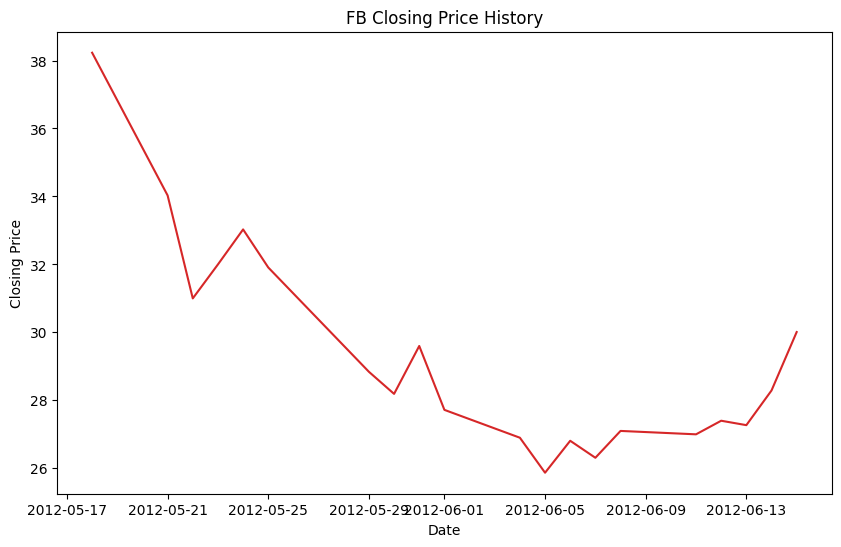

In [4]:
plt.figure(figsize=(10,6), dpi=100)
plt.plot(dataset.Date[0:20], dataset.Close[0:20], color='tab:red')
plt.gca().set(title=stock_name+" Closing Price History", xlabel='Date', ylabel="Closing Price")
plt.show()

# 5. Data Preprocessing

Data Normalization: We use MinMaxScaler to scale the values between 0 and 1, making them ready for LSTM.<br>
After Normalization the dataset is splitting into 80% training and 20% testing dataset.

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset = dataset.values
Y = dataset[:,4:5]
X = dataset[:,1:4]
X = sc.fit_transform(X)
Y = sc.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Dataset Preprocessing Completed")
print("Dataset Normalized Values : "+str(X))
print("Dataset Train & Test Split. 80% dataset used for training and 20% for testing")
print("80% training size : "+str(X_train.shape[0]))
print("20% testing size : "+str(X_test.shape[0]))

Dataset Preprocessing Completed
Dataset Normalized Values : [[0.14590942 0.16236409 0.12544473]
 [0.11230825 0.11170504 0.09477365]
 [0.08844655 0.09305716 0.08213716]
 ...
 [0.98435598 0.98451072 0.99104404]
 [0.97534697 0.97874021 0.97865293]
 [0.97559046 0.97691794 0.98398969]]
Dataset Train & Test Split. 80% dataset used for training and 20% for testing
80% training size : 1104
20% testing size : 277


In [6]:
mse = []

In [7]:
def calculateMSE(algorithm, predict, y_test):
    mse_value = mean_squared_error(y_test,predict)
    mse.append(mse_value)
    print(algorithm+" MSE value : "+str('{:.6f}'.format(mse_value))+"\n")
    print(algorithm+" Accuracy  : "+str(1 - mse_value)+"\n\n")
    
    predict = sc.inverse_transform(predict)
    predict = predict.ravel()
    labels = y_test.reshape(y_test.shape[0],1)
    labels = sc.inverse_transform(labels)
    labels = labels.ravel()
    labels = labels[0:100]
    predict = predict[0:100]
    for i in range(0,20):
        print(algorithm+" Predicted Stock Price: "+str(predict[i])+" Original Stock Price : "+str(labels[i]))

    #plotting predicted and original RUL values
    plt.plot(labels, color = 'red', label = 'Original Stock Price')
    plt.plot(predict, color = 'green', label = 'Predicted Stock Price')
    plt.title(algorithm+' Predicted Stock Price Graph')
    plt.xlabel('Test Data Size')
    plt.ylabel('Predicted Stock Price')
    plt.legend()
    plt.show()

# 6. ANN Model 

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
ANN MSE value : 0.000048

ANN Accuracy  : 0.9999516903675896


ANN Predicted Stock Price: 21.967993 Original Stock Price : 22.27
ANN Predicted Stock Price: 20.514536 Original Stock Price : 20.62
ANN Predicted Stock Price: 73.84923 Original Stock Price : 73.59
ANN Predicted Stock Price: 128.65488 Original Stock Price : 128.99
ANN Predicted Stock Price: 75.629425 Original Stock Price : 75.61
ANN Predicted Stock Price: 103.08406 Original Stock Price : 103.93999999999998
ANN Predicted Stock Price: 54.949783 Original Stock Price : 57.2
ANN Predicted Stock Price: 26.422337 Original Stock Price : 27.71
ANN Predicted Stock Price: 53.4833 Original Stock Price : 53.81
ANN Predicted Stock Price: 114.40636 Original Stock Price : 114.28000000000002
ANN Predicted Stock Price: 77.1754 Original Stock Price : 77.56
ANN Predicted Stock Price: 117.79845 Original Stock Price : 116.92
ANN Predicted Stock Price: 65.81081 Original St

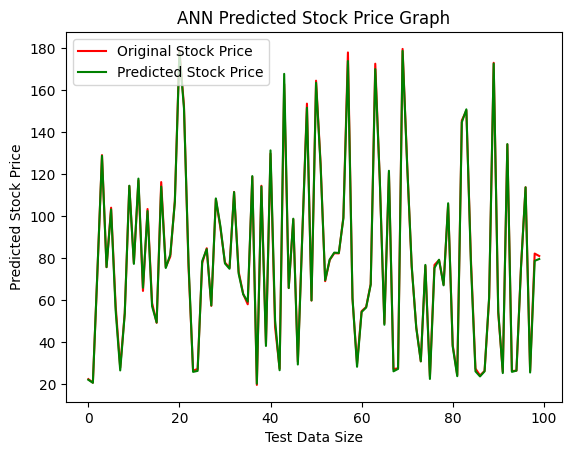

In [8]:
if os.path.exists('model/ann_model.json'):
    with open('model/ann_model.json', "r") as json_file:
        loaded_model_json = json_file.read()
        ann = model_from_json(loaded_model_json)
    json_file.close()
    ann.load_weights("model/ann_model.weights.h5")
    ann.predict(X_test)   
else:
    #creating neural object with 50 and 50 neurons and learning rate is 0.005
    ann = Sequential()
    #defining neural network with 50 neurons
    ann.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))
    ann.add(Dense(50, activation='relu'))#50 neurons
    ann.add(Dense(1))
    ann.compile(optimizer="adam", loss='mean_squared_error')
    hist = ann.fit(X_train, y_train, epochs = 1, batch_size = 8, validation_data=(X_test, y_test))
    ann.save_weights('model/ann_model.weights.h5')            
    model_json = ann.to_json()
    with open("model/ann_model.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()
    f = open('model/ann_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()
#performing prediction on test data using ANN   
predict = ann.predict(X_test)
calculateMSE("ANN", predict, y_test)

# 7. LSTM Model
We construct a Long Short-Term Memory (LSTM) model with multiple layers and Dropout to prevent overfitting. <br>
Model Training: The model is trained using the training dataset with one epoch for testing. <br>
Prediction: We use the trained model to make predictions on the stock prices. <br>
Saving & Loading Model: Save the model architecture in JSON format and the trained weights in HDF5 format.<br>
Load previously saved model and weights for future predictions.

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 172ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
LSTM MSE value : 0.000680

LSTM Accuracy  : 0.9993204310226892


LSTM Predicted Stock Price: 30.463276 Original Stock Price : 22.27
LSTM Predicted Stock Price: 29.230556 Original Stock Price : 20.62
LSTM Predicted Stock Price: 70.803185 Original Stock Price : 73.59
LSTM Predicted Stock Price: 127.039314 Original Stock Price : 128.99
LSTM Predicted Stock Price: 72.47122 Original Stock Price : 75.61
LSTM Predicted Stock Price: 99.38941 Original Stock Price : 103.93999999999998
LSTM Predicted Stock Price: 54.724358 Original Stock Price : 57.2
LSTM Predicted Stock Price: 33.845097 Original Stock Price : 27.71
LSTM Predicted Stock Price: 53.431652 Original Stock Price : 53.81
LSTM Predicted Stock Price: 111.338066 Original Stock Price : 114.28000000000002
LSTM Predicted Stock Price: 73.93144 Original Stock Price : 77.56
LSTM Predicted Stock Price: 114.96259 Original Stock Price : 116.92
LSTM Predicted Stock Price: 

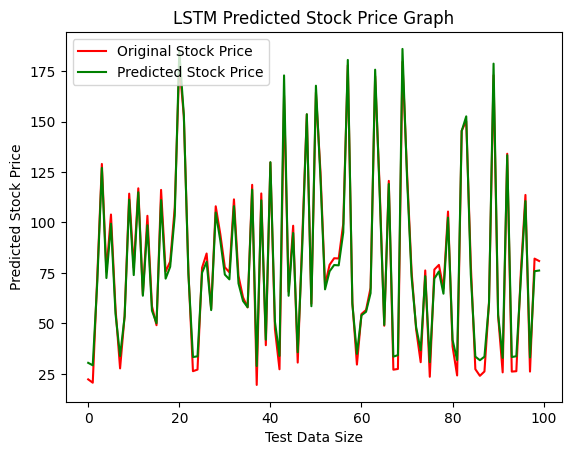

In [9]:
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

if os.path.exists('model/lstm_model.json'):
    with open('model/lstm_model.json', "r") as json_file:
        loaded_model_json = json_file.read()
        lstm = model_from_json(loaded_model_json)
    json_file.close()
    lstm.load_weights("model/lstm_model.weights.h5")
    predict = lstm.predict(X_test1)  
else:
    #training with LSTM algorithm and saving trained model and LSTM refrence assigned to regression variable
    lstm = Sequential()
    #defining 32 neurons
    lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train1.shape[1], X_train1.shape[2])))
    #0.2 as the drop out
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(units = 50, return_sequences = True)) #16 another layer neurons
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(units = 50, return_sequences = True))
    lstm.add(Dropout(0.2))
    lstm.add(LSTM(units = 50))
    lstm.add(Dropout(0.2))
    lstm.add(Dense(units = 1))
    lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')
    hist = lstm.fit(X_train1, y_train, epochs = 1, batch_size = 8, validation_data=(X_test1, y_test))
    lstm.save_weights('model/lstm_model.weights.h5')            
    model_json = lstm.to_json()
    with open("model/lstm_model.json", "w") as json_file:
        json_file.write(model_json)
    json_file.close()
    f = open('model/lstm_history.pckl', 'wb')
    pickle.dump(hist.history, f)
    f.close()
#performing prediction on test data    
predict = lstm.predict(X_test1)
calculateMSE("LSTM", predict, y_test)

# 8. Comparison Graphs
Comparing performance of ANN and LSTM to know which one is better fit for stock price prediction

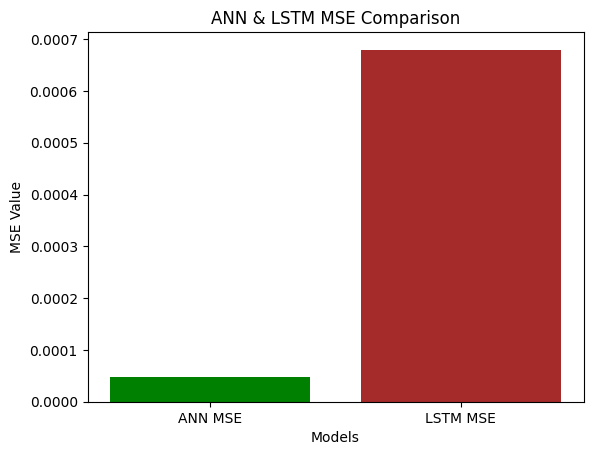

In [10]:
height = mse
bars = ('ANN MSE','LSTM MSE')
y_pos = np.arange(len(bars)) 
plt.bar(y_pos, height, color=['green', 'brown'])
plt.xticks(y_pos, bars)
plt.ylabel("MSE Value")  # Label y-axis
plt.xlabel("Models")  # Label x-axis
plt.title("ANN & LSTM MSE Comparison")
plt.show()

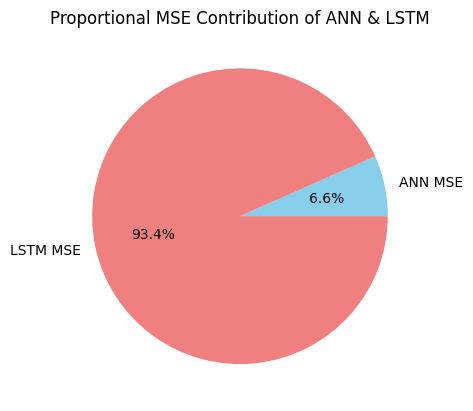

In [11]:
plt.pie(mse, labels=bars, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title("Proportional MSE Contribution of ANN & LSTM")
plt.show()

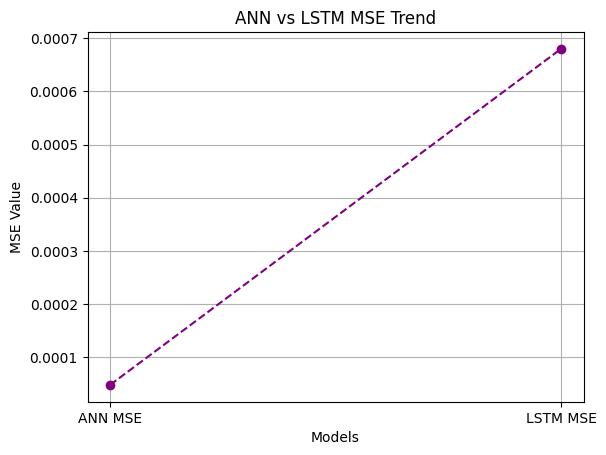

In [12]:
plt.plot(bars, mse, marker='o', linestyle='dashed', color='purple')
plt.xlabel("Models")
plt.ylabel("MSE Value")
plt.title("ANN vs LSTM MSE Trend")
plt.grid(True)
plt.show()